In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
animals = pd.read_csv('/Volumes/work/data/kaggle/shelteranimaloutcomes/train.csv',sep=',')

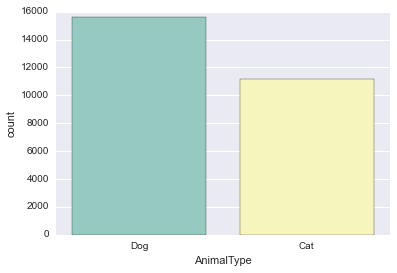

In [3]:
#count the number of cats and dogs
sns.countplot(animals.AnimalType, palette='Set3')

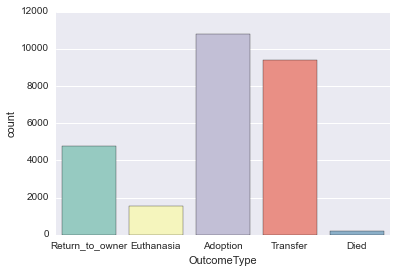

In [6]:
sns.countplot(animals.OutcomeType,palette='Set3')

In [21]:
def get_sex(x,y):
    x = str(x)
    if x.find('Male') >= 0 and y == 0: return 'male'
    if x.find('Female') >= 0 and y == 0: return 'female'
    if x.find('Spayed') >= 0 and y == 1: return 'neutered'
    if x.find('Neutered') >= 0 and y == 1: return 'neutered'
    if x.find('Intact') >= 0 and y == 1: return 'intact'
    return 'Unknown'

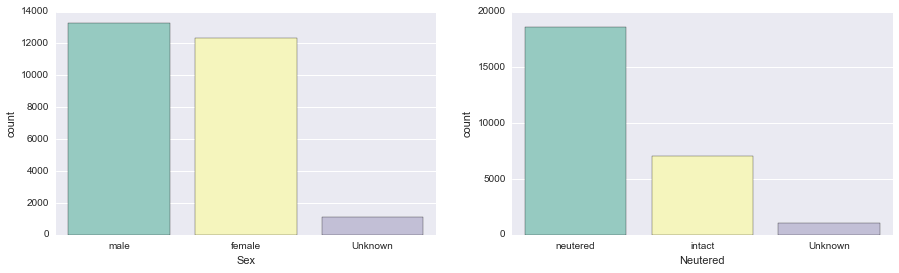

In [22]:
animals['Sex'] = animals.SexuponOutcome.apply(get_sex,args=(0,))
animals['Neutered'] = animals.SexuponOutcome.apply(get_sex,args=(1,))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(animals.Sex,palette='Set3',ax=ax1)
sns.countplot(animals.Neutered,palette='Set3',ax=ax2)

In [181]:
def isNaN(num):
    return num != num

def get_age_range(x):
    x = str(x)
    dt = x.split()
    x = float(dt[0])
    if not math.isnan(x):
        weeks = 0
        if dt[1] == "year" or dt[1] == "years":
            weeks = 52 * int(dt[0])
        if dt[1] == 'months' or dt[1] == 'month':
            weeks = 4 * int(dt[0])     
        if weeks != 0:
            x = weeks
        if x > 0 and x <= 52 : return 1
        if x > 52 and x <= 105: return 2
        if x > 105 and x <= 260: return 3
        return 4
    else:
        return 4




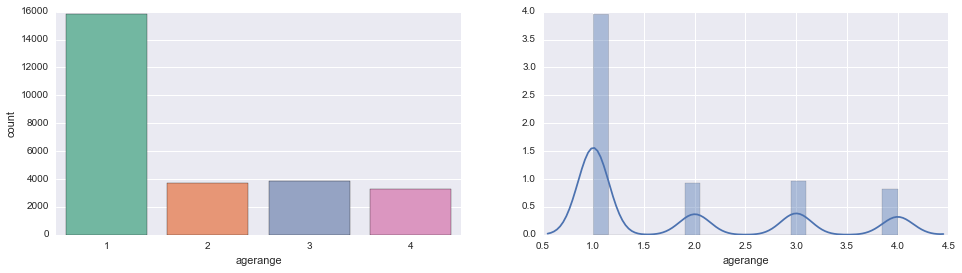

In [182]:
# get_age_range(animals.AgeuponOutcome[1:5])
animals['agerange'] = animals.AgeuponOutcome.apply(get_age_range)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(animals.agerange,palette='Set2',ax=ax1)
sns.distplot(animals.agerange,bins = 20,ax=ax2)

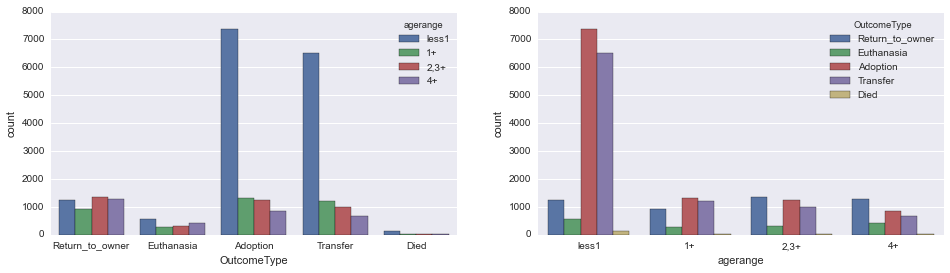

In [161]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals,x='OutcomeType',hue='agerange',ax=ax1)
sns.countplot(data=animals,x='agerange',hue='OutcomeType',ax=ax2)

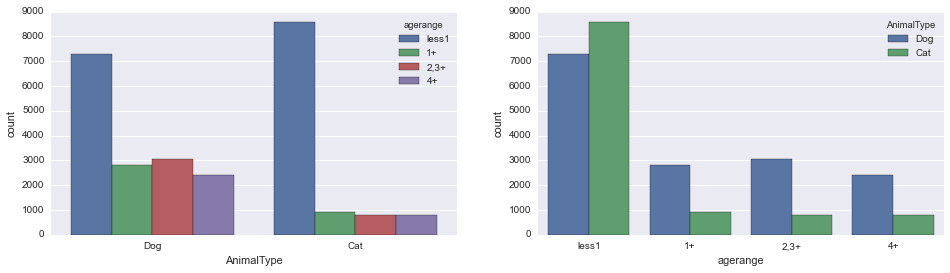

In [162]:
#dogs vs cat age range and missing
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals,x='AnimalType',hue='agerange',ax=ax1)
sns.countplot(data=animals,x='agerange',hue='AnimalType',ax=ax2)

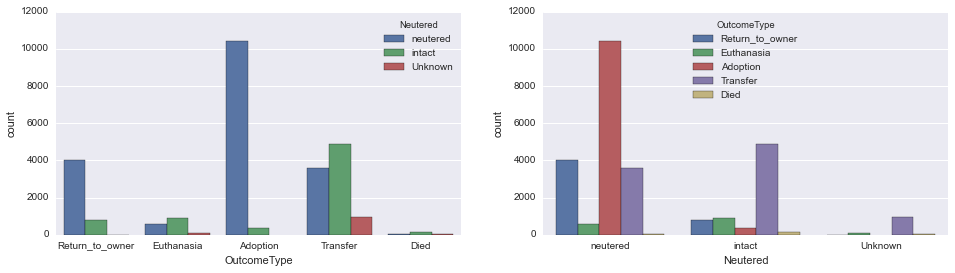

In [163]:
#so neutered(non reprdocution) animal has high adoption point
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='Neutered', ax=ax1)
sns.countplot(data=animals, x='Neutered',hue='OutcomeType', ax=ax2)

In [215]:
from datetime import datetime
def extract_month_year(x,isyear=True):
    x = str(x)
    date_obj = datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
#     dts = str(date_obj.month)+"-"+str(date_obj.year)
    if isyear:
        return date_obj.year
    return date_obj.month

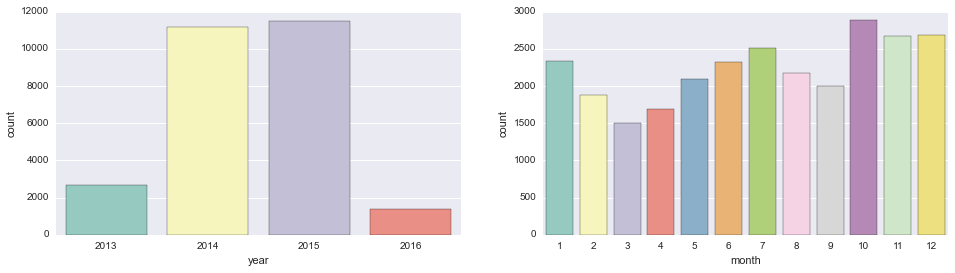

In [216]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
animals['year'] = animals.DateTime.apply(extract_month_year)
animals['month'] = animals.DateTime.apply(extract_month_year,args=(False,))
sns.countplot(animals.year,palette='Set3',ax=ax1)
sns.countplot(animals.month,palette='Set3',ax=ax2)

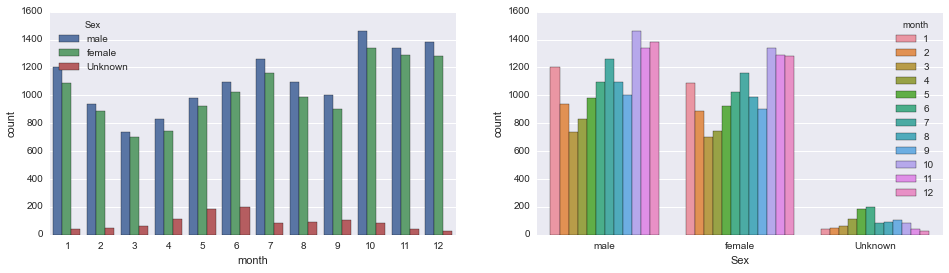

In [217]:
#frequency of lost animal monthly wise based on sex
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='month',hue='Sex', ax=ax1)
sns.countplot(data=animals, x='Sex',hue='month', ax=ax2)

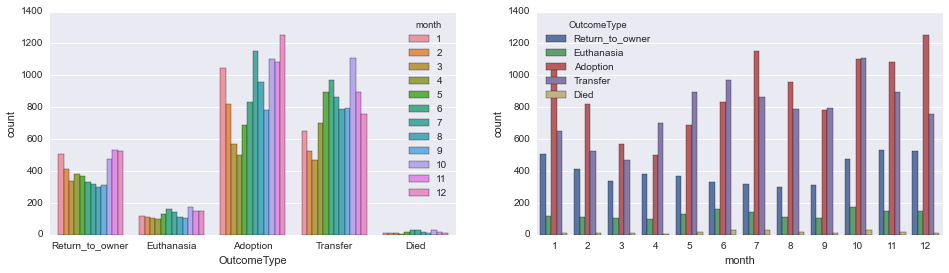

In [220]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='month', ax=ax1)
sns.countplot(data=animals, x='month',hue='OutcomeType', ax=ax2)

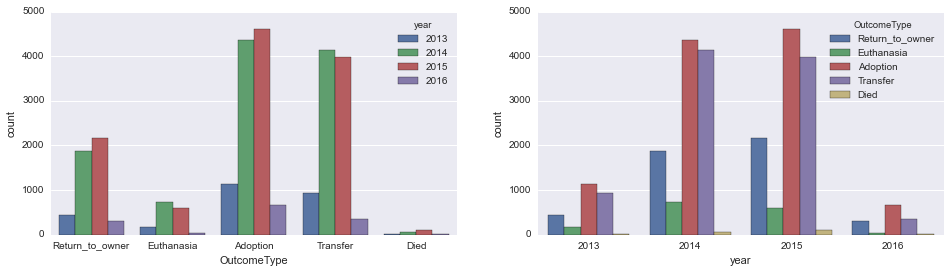

In [221]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType',hue='year', ax=ax1)
sns.countplot(data=animals, x='year',hue='OutcomeType', ax=ax2)